# Introduction to Pandas by Kenji

## Objectives

* Create a DataFrame with data from csv files getting over some initial hurdles
* See some basic attributes of the DataFrame
* Select some more interesting data
* Perform calculations
* Plot some results

## Problem Statement

We have a library of extracts arrayed in 384 well plates that we have tested in HeLa cells to screen for new cancer drugs. 24 hours after we dose the cells with the extracts we image the cells and record 256(or so) different parameters about the individual cells in each well. The Library table and the assay data are share one column called "Prefraction".

We need to send one of the plates to *Insert Pharma Company* because they are interested in funding us to generate
more plates, but want to make sure we have interesting stuff. The goal of this hour is to determine which 384_well plate to send them.

## Resources
* Bruno sent me this http://www.dataschool.io/best-python-pandas-resources/ which has some longer introductions that are much more detailed
* He also sent me this https://github.com/UofTCoders/studyGroup/blob/gh-pages/lessons/pandas_walkthrough/UofT-pandas.ipynb which I will follow a little more closely and was derived closely from https://nsoontie.github.io/2015-03-05-ubc/novice/python/Pandas-Lesson.html
* Please also refer to an epically brief intro on the pandas documentation page http://pandas.pydata.org/pandas-docs/stable/10min.html

#   

In [73]:
#Import the necessary Libraries for standard Pandas workflow
import pandas as pd
import numpy as np
from scipy import stats
import math

#Magic to get the plots to show up in the jupyter notebook
%matplotlib inline

from pandas import set_option
set_option('display.max_rows', 10)

In [74]:
#Lets start by reading a csv file into a pandas DataFrame using pd.read_csv()
bacLib = pd.read_csv('Library_Data.csv')

In [75]:
bacLib

,Unnamed: 0,Plate,Plate Number,Well,Prefraction,Plate Notes,Well Notes,384_Plate,384_Plate Number,384_Well,384_Prefraction,384_Plate Notes,384_Well Notes
0,0,RLUS_96_1799_1811,37,A02,RLUS-1799A,null,NaN,RLUS_384_1799_1850,10,A03,RLUS-1799A,null,NaN
1,1,RLUS_96_1799_1811,37,A03,RLUS-1799B,null,NaN,RLUS_384_1799_1850,10,A05,RLUS-1799B,null,NaN
2,2,RLUS_96_1799_1811,37,A04,RLUS-1799C,null,NaN,RLUS_384_1799_1850,10,A07,RLUS-1799C,null,NaN
3,3,RLUS_96_1799_1811,37,A05,RLUS-1799D,null,NaN,RLUS_384_1799_1850,10,A09,RLUS-1799D,null,NaN
4,4,RLUS_96_1799_1811,37,A06,RLUS-1799E,null,NaN,RLUS_384_1799_1850,10,A11,RLUS-1799E,null,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,2450,RLUS_96_2202_2214,68,H04,RLUS-2214A,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P08,RLUS-2214A,null,NaN
2451,2451,RLUS_96_2202_2214,68,H05,RLUS-2214B,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P10,RLUS-2214B,null,NaN
2452,2452,RLUS_96_2202_2214,68,H06,RLUS-2214C,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P12,RLUS-2214C,null,NaN
2453,2453,RLUS_96_2202_2214,68,H08,RLUS-2214E,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P16,RLUS-2214E,null,NaN


In [76]:
cp = pd.read_csv('CP_Data.csv')

In [77]:
cp

,Can't be too easy every time,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring...,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScori...,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring...,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScori...,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScorin...,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScor...,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScor...,...,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiW...,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto,Prefraction
2,0.070092773,-0.250830078,-0.208115234,-0.250830078,-0.208115234,0.020620117,-0.284599609,-0.296625977,0.070092773,-0.018564453,...,0.071230469,-0.070170898,0.002773437,0.097109375,-0.087729492,-0.067407227,-5.86E-05,0.166005859,0.118945313,RLUS-1799A
3,0.092944336,-0.426416016,-0.354208984,-0.426416016,-0.354208984,-0.84269043,-0.456865234,-0.714594727,0.092944336,-0.063486328,...,0.082167969,-0.077397461,0.002773437,0.1396875,-0.128745117,-0.075219727,-5.86E-05,0.285146484,0.118945313,RLUS-1799B
4,0.160717773,-0.426416016,-0.354208984,-0.426416016,-0.354208984,-0.84269043,-0.164287109,-0.714594727,0.160717773,-0.063486328,...,0.088027344,-0.043217773,0.002773437,0.095546875,-0.118393555,-0.042407227,-5.86E-05,0.169521484,0.070703125,RLUS-1799C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,0.208423186,-0.46952149,-0.27127175,-0.46952149,-0.27127175,0.078729179,-0.437137493,-0.323138199,0.208423186,0.124860574,...,-0.178781231,-0.120998476,-0.226409131,-0.062165378,-0.093159764,-0.112070568,-0.001756767,0.196056105,0.112860648,RLUS-2214A
2443,0.208423186,-0.07889649,0.109686385,-0.07889649,0.109686385,0.310627045,-0.154172554,0.018450699,0.208423186,0.064075513,...,-0.164299524,-0.097560976,-0.077781083,-0.062165378,-0.105354885,-0.090157458,-0.001756767,0.234165861,0.079324063,RLUS-2214B
2444,0.31875093,-0.416930027,-0.231256507,-0.416930027,-0.231256507,0.161236801,-0.340148163,-0.23396137,0.31875093,-0.034731001,...,-0.229848305,-0.185594512,-0.223741449,-0.165823914,-0.152992081,-0.172855629,-0.001756767,0.205011898,-0.100856075,RLUS-2214C
2445,-0.419932332,-0.519826368,-0.492308336,-0.519826368,-0.492308336,0.582921252,-0.532030785,-0.068183931,-0.419932332,0.560836184,...,-0.2462355,-0.423971037,0.398284131,-0.783201963,-0.388319825,-0.423808373,-0.001756767,-0.195103361,0.028447539,RLUS-2214E


In [78]:
#Don't panic! That was intentional. So your file had some nonsense at the beginning. 
#Skip it with the skip rows parameter
cp = pd.read_csv('CP_Data.csv',skiprows=2)
cp

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto,Prefraction
0,0.070093,-0.250830,-0.208115,-0.250830,-0.208115,0.020620,-0.284600,-0.296626,0.070093,-0.018564,...,0.071230,-0.070171,0.002773,0.097109,-0.087729,-0.067407,-0.000059,0.166006,0.118945,RLUS-1799A
1,0.092944,-0.426416,-0.354209,-0.426416,-0.354209,-0.842690,-0.456865,-0.714595,0.092944,-0.063486,...,0.082168,-0.077397,0.002773,0.139687,-0.128745,-0.075220,-0.000059,0.285146,0.118945,RLUS-1799B
2,0.160718,-0.426416,-0.354209,-0.426416,-0.354209,-0.842690,-0.164287,-0.714595,0.160718,-0.063486,...,0.088027,-0.043218,0.002773,0.095547,-0.118394,-0.042407,-0.000059,0.169521,0.070703,RLUS-1799C
3,0.166187,-0.360791,-0.308896,-0.360791,-0.308896,-0.365151,-0.394756,-0.471235,0.166187,-0.063486,...,0.031387,-0.098882,0.002773,0.066641,-0.108433,-0.100806,-0.000059,0.146670,0.118945,RLUS-1799D
4,0.187085,-0.326416,-0.308896,-0.326416,-0.308896,-0.209487,-0.436553,-0.316548,0.187085,-0.063486,...,-0.066738,-0.050835,0.002773,-0.172891,-0.032456,-0.051196,-0.000059,0.055459,0.038672,RLUS-1799E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,0.208423,-0.469521,-0.271272,-0.469521,-0.271272,0.078729,-0.437137,-0.323138,0.208423,0.124861,...,-0.178781,-0.120998,-0.226409,-0.062165,-0.093160,-0.112071,-0.001757,0.196056,0.112861,RLUS-2214A
2441,0.208423,-0.078896,0.109686,-0.078896,0.109686,0.310627,-0.154173,0.018451,0.208423,0.064076,...,-0.164300,-0.097561,-0.077781,-0.062165,-0.105355,-0.090157,-0.001757,0.234166,0.079324,RLUS-2214B
2442,0.318751,-0.416930,-0.231257,-0.416930,-0.231257,0.161237,-0.340148,-0.233961,0.318751,-0.034731,...,-0.229848,-0.185595,-0.223741,-0.165824,-0.152992,-0.172856,-0.001757,0.205012,-0.100856,RLUS-2214C
2443,-0.419932,-0.519826,-0.492308,-0.519826,-0.492308,0.582921,-0.532031,-0.068184,-0.419932,0.560836,...,-0.246235,-0.423971,0.398284,-0.783202,-0.388320,-0.423808,-0.001757,-0.195103,0.028448,RLUS-2214E


In [168]:
#Actually, the first column of the bacLib DataFrame is a duplicate of the index because it was written from a 
#dataframe itself. Lets get rid of that with the index_col = paramter of pd.read_csv()
bacLib = pd.read_csv('Library_Data.csv', index_col=0)

In [169]:
bacLib

,Plate,Plate Number,Well,Prefraction,Plate Notes,Well Notes,384_Plate,384_Plate Number,384_Well,384_Prefraction,384_Plate Notes,384_Well Notes
0,RLUS_96_1799_1811,37,A02,RLUS-1799A,null,NaN,RLUS_384_1799_1850,10,A03,RLUS-1799A,null,NaN
1,RLUS_96_1799_1811,37,A03,RLUS-1799B,null,NaN,RLUS_384_1799_1850,10,A05,RLUS-1799B,null,NaN
2,RLUS_96_1799_1811,37,A04,RLUS-1799C,null,NaN,RLUS_384_1799_1850,10,A07,RLUS-1799C,null,NaN
3,RLUS_96_1799_1811,37,A05,RLUS-1799D,null,NaN,RLUS_384_1799_1850,10,A09,RLUS-1799D,null,NaN
4,RLUS_96_1799_1811,37,A06,RLUS-1799E,null,NaN,RLUS_384_1799_1850,10,A11,RLUS-1799E,null,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2450,RLUS_96_2202_2214,68,H04,RLUS-2214A,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P08,RLUS-2214A,null,NaN
2451,RLUS_96_2202_2214,68,H05,RLUS-2214B,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P10,RLUS-2214B,null,NaN
2452,RLUS_96_2202_2214,68,H06,RLUS-2214C,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P12,RLUS-2214C,null,NaN
2453,RLUS_96_2202_2214,68,H08,RLUS-2214E,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P16,RLUS-2214E,null,NaN


In [81]:
#We can see some general properties of our new DataFrame by exploring some of its attributes
cp.shape

(2445, 249)

In [82]:
#See the columns
cp.columns

Index(['All_Cells_Mean_Area_MultiWaveScoring_EdU',
       'All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU',
       'All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU',
       'All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU',
       'All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU',
       'All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU',
       'All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU',
       'All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU',
       'All_Nuclei_Mean_Area_MultiWaveScoring_EdU',
       'All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU',
       ...
       'Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto',
       'Positive_TUBULIN_MultiWaveScoring_cyto',
       'Shape_factor_IMA_Summary_cyto', 'Texture_Index_Transfluor_cyto',
       'Total_Cells_Micronuclei_cyto', 'Total_Cells_MultiWaveScoring_cyto',
       'Total_Micronuclei_Micronuclei_cyto', 'Total_area_IMA_Summary_cyto',
       'Total_intensity_IMA_Summary_cyto', 'Pre

In [83]:
#You can look at the first three rows by using the head() function
bacLib.head(3)

,Plate,Plate Number,Well,Prefraction,Plate Notes,Well Notes,384_Plate,384_Plate Number,384_Well,384_Prefraction,384_Plate Notes,384_Well Notes
0,RLUS_96_1799_1811,37,A02,RLUS-1799A,null,NaN,RLUS_384_1799_1850,10,A03,RLUS-1799A,null,NaN
1,RLUS_96_1799_1811,37,A03,RLUS-1799B,null,NaN,RLUS_384_1799_1850,10,A05,RLUS-1799B,null,NaN
2,RLUS_96_1799_1811,37,A04,RLUS-1799C,null,NaN,RLUS_384_1799_1850,10,A07,RLUS-1799C,null,NaN


In [84]:
#You can look at the last five rows using the tail function
bacLib.tail(5)

,Plate,Plate Number,Well,Prefraction,Plate Notes,Well Notes,384_Plate,384_Plate Number,384_Well,384_Prefraction,384_Plate Notes,384_Well Notes
2450,RLUS_96_2202_2214,68,H04,RLUS-2214A,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P08,RLUS-2214A,null,NaN
2451,RLUS_96_2202_2214,68,H05,RLUS-2214B,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P10,RLUS-2214B,null,NaN
2452,RLUS_96_2202_2214,68,H06,RLUS-2214C,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P12,RLUS-2214C,null,NaN
2453,RLUS_96_2202_2214,68,H08,RLUS-2214E,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P16,RLUS-2214E,null,NaN
2454,RLUS_96_2202_2214,68,H09,RLUS-2214F,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P18,RLUS-2214F,null,NaN


In [85]:
bacLib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455 entries, 0 to 2454
Data columns (total 12 columns):
Plate               2455 non-null object
Plate Number        2455 non-null int64
Well                2455 non-null object
Prefraction         2455 non-null object
Plate Notes         2455 non-null object
Well Notes          51 non-null object
384_Plate           2455 non-null object
384_Plate Number    2455 non-null int64
384_Well            2455 non-null object
384_Prefraction     2455 non-null object
384_Plate Notes     2455 non-null object
384_Well Notes      41 non-null object
dtypes: int64(2), object(10)
memory usage: 249.3+ KB


In [132]:
#One extremely usefull function for DataFrames is DataFrame.describe()
#This is great for allowing you to quickly get a sense of what the data looks like
cp.describe()

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Nucl_Integr_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto
count,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,...,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000
mean,-0.031777,-0.024115,-0.022921,-0.024115,-0.022921,0.008147,-0.037441,-0.028601,-0.031777,0.098598,...,0.053369,0.080636,0.026549,-0.017944,0.027831,0.024061,0.026722,0.005880,-0.032538,0.113112
std,0.200385,0.263451,0.230122,0.263451,0.230122,0.254369,0.298953,0.269109,0.200385,0.172220,...,0.194164,0.193321,0.206061,0.170797,0.230927,0.190716,0.204535,0.062938,0.192822,0.184348
min,-0.646782,-0.797265,-0.924414,-0.797265,-0.924414,-0.906084,-0.830151,-0.869355,-0.646782,-0.691160,...,-0.829519,-0.727930,-0.746465,-0.623320,-0.851509,-0.755640,-0.745928,-0.123169,-0.614785,-0.758496
25%,-0.096187,-0.114053,-0.099587,-0.114053,-0.099587,-0.032925,-0.263896,-0.052744,-0.096187,-0.004893,...,-0.025469,-0.042554,-0.065469,-0.073654,-0.098721,-0.071919,-0.064282,-0.003291,-0.113799,-0.003125
50%,-0.022124,0.049404,0.020303,0.049404,0.020303,0.016670,0.072710,0.022852,-0.022124,0.041426,...,0.031328,0.112832,0.070098,-0.000938,0.083126,0.071428,0.070757,-0.000132,-0.024753,0.055674
75%,0.025640,0.138906,0.101162,0.138906,0.101162,0.092451,0.175705,0.113901,0.025640,0.159910,...,0.148711,0.207554,0.165410,0.002773,0.179913,0.149253,0.161938,0.000000,0.039346,0.211565
max,0.697038,0.747779,0.927295,0.747779,0.927295,0.814893,0.722342,0.744095,0.697038,0.701768,...,0.824492,0.631973,0.398120,0.923711,0.600728,0.422632,0.391436,0.858655,0.860933,0.664006


## Selecting Data
* To Select Columns: you can use ['Column'] DataFrame.column_name(if it doesn't lead with a number or have special characters)
* To Select Slices by the name of the index use DataFrame.loc[[],[]]
* To Select Slices by the index number use DataFrame.iloc[beginning_row:end_row,beggining_column:end_column]

### Columns

In [87]:
#Lets look at the library columns first. One at a time. This command will return a Series
bacLib['384_Plate']

0       RLUS_384_1799_1850
1       RLUS_384_1799_1850
2       RLUS_384_1799_1850
3       RLUS_384_1799_1850
4       RLUS_384_1799_1850
               ...        
2450    RLUS_384_2163_2214
2451    RLUS_384_2163_2214
2452    RLUS_384_2163_2214
2453    RLUS_384_2163_2214
2454    RLUS_384_2163_2214
Name: 384_Plate, dtype: object

In [90]:
#with a well-suited columnn name. Again this returns a Series
bacLib.Well

0       A02
1       A03
2       A04
3       A05
4       A06
       ... 
2450    H04
2451    H05
2452    H06
2453    H08
2454    H09
Name: Well, dtype: object

In [92]:
#Now Several: must be passed as a list. If you ask for multiple columns pandas returns a DataFrame.
bacLib[['384_Plate','384_Plate Number']]

,384_Plate,384_Plate Number
0,RLUS_384_1799_1850,10
1,RLUS_384_1799_1850,10
2,RLUS_384_1799_1850,10
3,RLUS_384_1799_1850,10
4,RLUS_384_1799_1850,10
...,...,...
2450,RLUS_384_2163_2214,17
2451,RLUS_384_2163_2214,17
2452,RLUS_384_2163_2214,17
2453,RLUS_384_2163_2214,17


In [94]:
#Now lets say that we wanted the first three columns of cp. Don't do this, it just shows what happens in the next example
firstthree = cp.columns.tolist()[0:3]
cp[firstthree]

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU
0,0.070093,-0.250830,-0.208115
1,0.092944,-0.426416,-0.354209
2,0.160718,-0.426416,-0.354209
3,0.166187,-0.360791,-0.308896
4,0.187085,-0.326416,-0.308896
...,...,...,...
2440,0.208423,-0.469521,-0.271272
2441,0.208423,-0.078896,0.109686
2442,0.318751,-0.416930,-0.231257
2443,-0.419932,-0.519826,-0.492308


In [97]:
#or Pandas includes .iloc[]. Note that the first semicolon means get all the rows
cp.iloc[:,0:3]

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU
0,0.070093,-0.250830,-0.208115
1,0.092944,-0.426416,-0.354209
2,0.160718,-0.426416,-0.354209
3,0.166187,-0.360791,-0.308896
4,0.187085,-0.326416,-0.308896
...,...,...,...
2440,0.208423,-0.469521,-0.271272
2441,0.208423,-0.078896,0.109686
2442,0.318751,-0.416930,-0.231257
2443,-0.419932,-0.519826,-0.492308


### Rows 

In [103]:
# Since the indexes are assigned by position at the moment these two methods are the same
cp.loc[0]

All_Cells_Mean_Area_MultiWaveScoring_EdU                 0.0700928
All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU        -0.25083
All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU     -0.208115
All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU        -0.25083
All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU     -0.208115
                                                           ...    
Total_Cells_MultiWaveScoring_cyto                       -0.0674072
Total_Micronuclei_Micronuclei_cyto                       -5.86e-05
Total_area_IMA_Summary_cyto                               0.166006
Total_intensity_IMA_Summary_cyto                          0.118945
Prefraction                                             RLUS-1799A
Name: 0, dtype: object

In [104]:
cp.iloc[0]

All_Cells_Mean_Area_MultiWaveScoring_EdU                 0.0700928
All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU        -0.25083
All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU     -0.208115
All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU        -0.25083
All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU     -0.208115
                                                           ...    
Total_Cells_MultiWaveScoring_cyto                       -0.0674072
Total_Micronuclei_Micronuclei_cyto                       -5.86e-05
Total_area_IMA_Summary_cyto                               0.166006
Total_intensity_IMA_Summary_cyto                          0.118945
Prefraction                                             RLUS-1799A
Name: 0, dtype: object

In [105]:
#get several rows
cp.loc[[0,3,5,445]]

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto,Prefraction
0,0.070093,-0.250830,-0.208115,-0.250830,-0.208115,0.020620,-0.284600,-0.296626,0.070093,-0.018564,...,0.071230,-0.070171,0.002773,0.097109,-0.087729,-0.067407,-0.000059,0.166006,0.118945,RLUS-1799A
3,0.166187,-0.360791,-0.308896,-0.360791,-0.308896,-0.365151,-0.394756,-0.471235,0.166187,-0.063486,...,0.031387,-0.098882,0.002773,0.066641,-0.108433,-0.100806,-0.000059,0.146670,0.118945,RLUS-1799D
5,0.041772,0.127588,0.102842,0.127588,0.102842,0.058511,0.168779,0.096235,0.041772,-0.004893,...,0.080605,0.052983,0.002773,0.051797,0.029526,0.052173,-0.000059,0.013076,0.025781,RLUS-1799F
445,-0.022954,0.062051,0.071045,0.062051,0.071045,0.016670,0.096709,0.027949,-0.022954,-0.025430,...,0.281226,0.110137,0.001836,0.210688,0.210718,0.111943,-0.003291,-0.064971,0.102148,RLUS-1874B


## Challenge Question 0:
* Store only the middle five rows and columns of the cp DataFrame to midFive

In [135]:
#Here's an answer. I'm sure there are others.
cp.iloc[2445//2-2:2445//2+3,249//2-2:249//2+3]

,Total_Cells_MultiWaveScoring_EdU,Total_area_IMA_Summary_EdU,Total_intensity_IMA_Summary_EdU,Width_IMA_Summary_EdU,All_ACTIN_Mean_Cell_Aver_Intens_MultiWaveScoring_cyto
1220,0.128730,-0.035459,-0.013506,-0.048223,0.045566
1221,-0.068574,0.261436,-0.019561,0.212676,-0.059824
1222,-0.064473,0.055771,-0.023271,0.045684,0.043809
1223,0.030684,0.015928,0.033037,0.008184,0.079355
1224,0.078926,-0.006357,-0.023271,-0.026934,0.166660


## Boolean Indexing 

In [122]:
#Lets say that I want to find out some information about one plate that I know has interesting compounds, plate 15. 
bacLib[bacLib['384_Plate Number'] == 15]

,Plate,Plate Number,Well,Prefraction,Plate Notes,Well Notes,384_Plate,384_Plate Number,384_Well,384_Prefraction,384_Plate Notes,384_Well Notes
1524,RLUS_96_2059_2071,57,A02,RLUS-2059A,null,NaN,RLUS_384_2059_2110,15,A03,RLUS-2059A,null,NaN
1525,RLUS_96_2059_2071,57,A03,RLUS-2059B,null,NaN,RLUS_384_2059_2110,15,A05,RLUS-2059B,null,NaN
1526,RLUS_96_2059_2071,57,A04,RLUS-2059C,null,NaN,RLUS_384_2059_2110,15,A07,RLUS-2059C,null,NaN
1527,RLUS_96_2059_2071,57,A05,RLUS-2059D,null,NaN,RLUS_384_2059_2110,15,A09,RLUS-2059D,null,NaN
1528,RLUS_96_2059_2071,57,A06,RLUS-2059E,null,NaN,RLUS_384_2059_2110,15,A11,RLUS-2059E,null,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1827,RLUS_96_2098_2110,60,H05,RLUS-2110B,Plated by Evan on 10/30/2012,NaN,RLUS_384_2059_2110,15,P10,RLUS-2110B,null,NaN
1828,RLUS_96_2098_2110,60,H06,RLUS-2110C,Plated by Evan on 10/30/2012,NaN,RLUS_384_2059_2110,15,P12,RLUS-2110C,null,NaN
1829,RLUS_96_2098_2110,60,H07,RLUS-2110D,Plated by Evan on 10/30/2012,NaN,RLUS_384_2059_2110,15,P14,RLUS-2110D,null,NaN
1830,RLUS_96_2098_2110,60,H08,RLUS-2110E,Plated by Evan on 10/30/2012,NaN,RLUS_384_2059_2110,15,P16,RLUS-2110E,null,NaN


In [120]:
#The not that NaN does not behave the same as None in python. Instead you should use notnull()
bacLib[bacLib['Well Notes'].notnull()]

,Plate,Plate Number,Well,Prefraction,Plate Notes,Well Notes,384_Plate,384_Plate Number,384_Well,384_Prefraction,384_Plate Notes,384_Well Notes
394,RLUS_96_1864_1876,42,A07,RLUS-1864E,null,change is position due to pipetting error,RLUS_384_1851_1902,11,A14,RLUS-1864E,null,change is position due to pipetting error
395,RLUS_96_1864_1876,42,A06,RLUS-1864F,null,change is position due to pipetting error,RLUS_384_1851_1902,11,A12,RLUS-1864F,null,change is position due to pipetting error
625,RLUS_96_1903_1915,45,A09,RLUS-1904B,null,do not test,RLUS_384_1903_1954,12,A17,RLUS-1904B,null,do not test
679,RLUS_96_1903_1915,45,G03,RLUS-1913B,null,do not test,RLUS_384_1903_1954,12,M05,RLUS-1913B,null,do not test
849,RLUS_96_1942_1954,48,A05,RLUS-1942D,null,do not test,RLUS_384_1903_1954,12,B10,RLUS-1942D,null,do not test
...,...,...,...,...,...,...,...,...,...,...,...,...
2373,RLUS_96_2189_2201,67,G09,RLUS-2201B,"Plated by Monica,Evan on 1/7/2013",Pipetting error.,RLUS_384_2163_2214,17,N17,RLUS-2201B,null,Pipetting error.
2374,RLUS_96_2189_2201,67,G10,RLUS-2201C,"Plated by Monica,Evan on 1/7/2013",Pipetting error.,RLUS_384_2163_2214,17,N19,RLUS-2201C,null,Pipetting error.
2375,RLUS_96_2189_2201,67,G11,RLUS-2201D,"Plated by Monica,Evan on 1/7/2013",Pipetting error.,RLUS_384_2163_2214,17,N21,RLUS-2201D,null,Pipetting error.
2376,RLUS_96_2189_2201,67,H02,RLUS-2201E,"Plated by Monica,Evan on 1/7/2013",Pipetting error.,RLUS_384_2163_2214,17,P03,RLUS-2201E,null,Pipetting error.


## Challenge Question 1:
* Given there is a column in the cp DataFrame named 'Mitotic_Cells_Micronuclei_cyto', store data as a new variable "mitotic", for rows in the top 25% of rows with the most mitotic cells.
#### Hints
*** DataFrame.describe() might be useful to find a cutoff value for the top 25%

In [141]:
#Answer to Challenge Question 1:
cuttoff = cp['Mitotic_Cells_Micronuclei_cyto'].describe().loc['75%']
mitotic = cp[cp['Mitotic_Cells_Micronuclei_cyto'] > cuttoff]
mitotic

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto,Prefraction
11,-0.199976,0.270557,0.082139,0.270557,0.082139,-0.024331,0.297881,0.144478,-0.199976,0.004502,...,0.246816,0.212358,0.002773,0.169180,0.182456,0.213501,-0.000059,-0.218545,-0.142969,RLUS-1800F
12,-0.117944,0.193604,0.194248,0.193604,0.194248,-0.032925,0.192412,0.235688,-0.117944,-0.004893,...,0.218301,0.170366,0.002773,0.196328,0.119761,0.171899,-0.000059,-0.183389,0.010742,RLUS-1801A
14,-0.143140,0.226611,0.126670,0.226611,0.126670,0.020620,0.181670,0.139009,-0.143140,-0.004893,...,0.119473,0.183062,0.002773,0.085781,0.142612,0.186157,-0.000059,-0.108584,0.016602,RLUS-1801C
15,-0.143140,0.194775,0.102842,0.194775,0.102842,0.031753,0.190068,0.113423,-0.143140,0.004502,...,0.221035,0.179937,0.002773,0.281094,0.202964,0.171704,-0.000059,-0.183389,-0.040625,RLUS-1801D
16,-0.143140,0.194189,0.102842,0.194189,0.102842,0.031753,0.181670,0.113423,-0.143140,-0.004893,...,0.163613,0.158843,0.002773,0.157852,0.259995,0.174048,-0.000059,-0.135146,-0.040625,RLUS-1801E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,0.129345,-0.301648,-0.114260,-0.301648,-0.114260,0.414095,-0.445903,-0.102864,0.129345,0.125623,...,0.237470,-0.167302,-0.029001,-0.062165,0.226925,-0.130363,-0.001757,0.196056,0.302076,RLUS-2210A
2422,0.020161,0.131107,0.160372,0.131107,0.160372,0.161237,0.069378,0.156027,0.020161,0.310074,...,0.358278,0.261052,-0.029001,0.267577,0.242359,0.263747,-0.001757,0.037710,0.371816,RLUS-2211A
2425,-0.130108,0.071656,-0.116165,0.071656,-0.116165,-0.064247,-0.117397,-0.053702,-0.130108,0.310074,...,0.442501,0.310976,0.014900,0.267577,0.237215,0.286994,-0.001757,-0.172809,0.159736,RLUS-2211D
2426,-0.130108,0.071656,-0.015365,0.071656,-0.015365,-0.129606,0.068997,-0.019022,-0.130108,0.155348,...,0.313309,0.208460,-0.037766,0.083126,0.218922,0.207917,-0.001757,-0.143655,0.170787,RLUS-2211E


## Making new columns and performing calculations
* In this section we are going to calculate the magnitude of the phenotype described by the parameters in the cp dataframe. Because each value describes the deviation from the control well of a specific parameter in either a positive or negative direction, the overall strength of the phenotype(how different these cells developed compared to the control) could be described by the sum of the square of these parameters.
    * FIRST we'll do something that is essential when manipulating data, make a copy and only work on that
    * We'll look at some ways to do calculations on a copy of the data
    * Then we'll implement

In [202]:
#Before we start changing the data, it might be smart to make a copy
cp_copy = cp.copy()

In [203]:
#In order to easily perform calculations I will index by the 'Prefraction' column and remove it from the DataFrame
#so that all the columns only contain floats
cp_copy.index = cp_copy.Prefraction
cp_copy = cp_copy.iloc[:,:-1]
cp_copy.head(2)

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Nucl_Integr_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto
Prefraction,,,,,,,,,,,,,,,,,,,,,
RLUS-1799A,0.070093,-0.250830,-0.208115,-0.250830,-0.208115,0.02062,-0.284600,-0.296626,0.070093,-0.018564,...,0.238979,0.071230,-0.070171,0.002773,0.097109,-0.087729,-0.067407,-0.000059,0.166006,0.118945
RLUS-1799B,0.092944,-0.426416,-0.354209,-0.426416,-0.354209,-0.84269,-0.456865,-0.714595,0.092944,-0.063486,...,0.171401,0.082168,-0.077397,0.002773,0.139687,-0.128745,-0.075220,-0.000059,0.285146,0.118945


In [200]:
half_cp_copy = cp_copy/2
half_cp_copy.head(2)

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Nucl_Integr_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto
Prefraction,,,,,,,,,,,,,,,,,,,,,
RLUS-1799A,0.035046,-0.125415,-0.104058,-0.125415,-0.104058,0.010310,-0.142300,-0.148313,0.035046,-0.009282,...,0.119490,0.035615,-0.035085,0.001387,0.048555,-0.043865,-0.033704,-0.000029,0.083003,0.059473
RLUS-1799B,0.046472,-0.213208,-0.177104,-0.213208,-0.177104,-0.421345,-0.228433,-0.357297,0.046472,-0.031743,...,0.085701,0.041084,-0.038699,0.001387,0.069844,-0.064373,-0.037610,-0.000029,0.142573,0.059473


In [204]:
cp_copy_squared = np.square(cp_copy)
cp_copy_squared.head(2)

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Nucl_Integr_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto
Prefraction,,,,,,,,,,,,,,,,,,,,,
RLUS-1799A,0.004913,0.062916,0.043312,0.062916,0.043312,0.000425,0.080997,0.087987,0.004913,0.000345,...,0.057111,0.005074,0.004924,0.000008,0.009430,0.007696,0.004544,3.433960e-09,0.027558,0.014148
RLUS-1799B,0.008639,0.181831,0.125464,0.181831,0.125464,0.710127,0.208726,0.510646,0.008639,0.004031,...,0.029378,0.006752,0.005990,0.000008,0.019513,0.016575,0.005658,3.433960e-09,0.081309,0.014148


In [209]:
cp_copy['Magnitude'] = cp_copy_squared.sum(axis = 1)**(1/2)
cp_copy

,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,All_Nuclei_Mean_Area_MultiWaveScoring_EdU,All_Nuclei_Mean_Average_Itensity_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto,Magnitude
Prefraction,,,,,,,,,,,,,,,,,,,,,
RLUS-1799A,0.070093,-0.250830,-0.208115,-0.250830,-0.208115,0.020620,-0.284600,-0.296626,0.070093,-0.018564,...,0.071230,-0.070171,0.002773,0.097109,-0.087729,-0.067407,-0.000059,0.166006,0.118945,1.638746
RLUS-1799B,0.092944,-0.426416,-0.354209,-0.426416,-0.354209,-0.842690,-0.456865,-0.714595,0.092944,-0.063486,...,0.082168,-0.077397,0.002773,0.139687,-0.128745,-0.075220,-0.000059,0.285146,0.118945,4.027012
RLUS-1799C,0.160718,-0.426416,-0.354209,-0.426416,-0.354209,-0.842690,-0.164287,-0.714595,0.160718,-0.063486,...,0.088027,-0.043218,0.002773,0.095547,-0.118394,-0.042407,-0.000059,0.169521,0.070703,3.465615
RLUS-1799D,0.166187,-0.360791,-0.308896,-0.360791,-0.308896,-0.365151,-0.394756,-0.471235,0.166187,-0.063486,...,0.031387,-0.098882,0.002773,0.066641,-0.108433,-0.100806,-0.000059,0.146670,0.118945,2.669409
RLUS-1799E,0.187085,-0.326416,-0.308896,-0.326416,-0.308896,-0.209487,-0.436553,-0.316548,0.187085,-0.063486,...,-0.066738,-0.050835,0.002773,-0.172891,-0.032456,-0.051196,-0.000059,0.055459,0.038672,2.282748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RLUS-2214A,0.208423,-0.469521,-0.271272,-0.469521,-0.271272,0.078729,-0.437137,-0.323138,0.208423,0.124861,...,-0.178781,-0.120998,-0.226409,-0.062165,-0.093160,-0.112071,-0.001757,0.196056,0.112861,3.281258
RLUS-2214B,0.208423,-0.078896,0.109686,-0.078896,0.109686,0.310627,-0.154173,0.018451,0.208423,0.064076,...,-0.164300,-0.097561,-0.077781,-0.062165,-0.105355,-0.090157,-0.001757,0.234166,0.079324,2.197419
RLUS-2214C,0.318751,-0.416930,-0.231257,-0.416930,-0.231257,0.161237,-0.340148,-0.233961,0.318751,-0.034731,...,-0.229848,-0.185595,-0.223741,-0.165824,-0.152992,-0.172856,-0.001757,0.205012,-0.100856,2.786720


#### A simpler example to see what just happened above

In [190]:
dude = np.array([[0,0.5,1],[0,0,0],[1,0,0]])
dudeDF = pd.DataFrame(dude)
dudeDF

,0,1,2
0,0,0.5,1
1,0,0.0,0
2,1,0.0,0


In [195]:
dudeDF2 = np.square(dudeDF)
dudeDF2

,0,1,2
0,0,0.25,1
1,0,0.00,0
2,1,0.00,0


In [198]:
dudeDF['mag'] = (dudeDF2.sum(axis=1))**(1/2)
dudeDF

,0,1,2,mag
0,0,0.5,1,1.118034
1,0,0.0,0,0.000000
2,1,0.0,0,1.000000


## Combining DataFrames
### A more intelligent way to merge tables
* Now that we are familiar with how to select columns and rows using slices and boolean indexing, we can start to think about how to merge the two dataframes together
* pd.concat() is a great way to do this if your DataFrames share common indexes
* So First we'll reindex or DataFrames by 'Prefraction'


In [205]:
bacLib.shape

(2455, 12)

In [210]:
cp_copy.shape

(2445, 249)

In [174]:
#Again, reindex by a column in the table
bacLib.index = bacLib.Prefraction

In [211]:
combined = pd.concat([bacLib,cp_copy], axis = 1)

In [212]:
combined

,Plate,Plate Number,Well,Prefraction,Plate Notes,Well Notes,384_Plate,384_Plate Number,384_Well,384_Prefraction,...,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto,Magnitude
RLUS-1799A,RLUS_96_1799_1811,37,A02,RLUS-1799A,null,NaN,RLUS_384_1799_1850,10,A03,RLUS-1799A,...,0.071230,-0.070171,0.002773,0.097109,-0.087729,-0.067407,-0.000059,0.166006,0.118945,1.638746
RLUS-1799B,RLUS_96_1799_1811,37,A03,RLUS-1799B,null,NaN,RLUS_384_1799_1850,10,A05,RLUS-1799B,...,0.082168,-0.077397,0.002773,0.139687,-0.128745,-0.075220,-0.000059,0.285146,0.118945,4.027012
RLUS-1799C,RLUS_96_1799_1811,37,A04,RLUS-1799C,null,NaN,RLUS_384_1799_1850,10,A07,RLUS-1799C,...,0.088027,-0.043218,0.002773,0.095547,-0.118394,-0.042407,-0.000059,0.169521,0.070703,3.465615
RLUS-1799D,RLUS_96_1799_1811,37,A05,RLUS-1799D,null,NaN,RLUS_384_1799_1850,10,A09,RLUS-1799D,...,0.031387,-0.098882,0.002773,0.066641,-0.108433,-0.100806,-0.000059,0.146670,0.118945,2.669409
RLUS-1799E,RLUS_96_1799_1811,37,A06,RLUS-1799E,null,NaN,RLUS_384_1799_1850,10,A11,RLUS-1799E,...,-0.066738,-0.050835,0.002773,-0.172891,-0.032456,-0.051196,-0.000059,0.055459,0.038672,2.282748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RLUS-2214A,RLUS_96_2202_2214,68,H04,RLUS-2214A,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P08,RLUS-2214A,...,-0.178781,-0.120998,-0.226409,-0.062165,-0.093160,-0.112071,-0.001757,0.196056,0.112861,3.281258
RLUS-2214B,RLUS_96_2202_2214,68,H05,RLUS-2214B,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P10,RLUS-2214B,...,-0.164300,-0.097561,-0.077781,-0.062165,-0.105355,-0.090157,-0.001757,0.234166,0.079324,2.197419
RLUS-2214C,RLUS_96_2202_2214,68,H06,RLUS-2214C,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P12,RLUS-2214C,...,-0.229848,-0.185595,-0.223741,-0.165824,-0.152992,-0.172856,-0.001757,0.205012,-0.100856,2.786720
RLUS-2214E,RLUS_96_2202_2214,68,H08,RLUS-2214E,Plated by Monica on 1/7/2013,NaN,RLUS_384_2163_2214,17,P16,RLUS-2214E,...,-0.246235,-0.423971,0.398284,-0.783202,-0.388320,-0.423808,-0.001757,-0.195103,0.028448,5.411176


## Groupby()
* You can use this function to do a lot of things iteratively to subsets of your data, for example, if we wanted to perform calculation on subsets of by '384_Plate Number'.

In [213]:
group384 = combined.groupby('384_Plate Number')

In [282]:
len(group384.groups)

8

In [216]:
group384.get_group(11).describe()

,Plate Number,384_Plate Number,All_Cells_Mean_Area_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Cell_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Nucl_Integr_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Area_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Aver_Intens_MultiWaveScoring_EdU,All_EdU_Mean_Stain_Integr_Intens_MultiWaveScoring_EdU,...,Positive_TUBULIN_Mean_Stain_Aver_Intens_MultiWaveScoring_cyto,Positive_TUBULIN_MultiWaveScoring_cyto,Shape_factor_IMA_Summary_cyto,Texture_Index_Transfluor_cyto,Total_Cells_Micronuclei_cyto,Total_Cells_MultiWaveScoring_cyto,Total_Micronuclei_Micronuclei_cyto,Total_area_IMA_Summary_cyto,Total_intensity_IMA_Summary_cyto,Magnitude
count,306.000000,306,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,42.509804,11,-0.065754,0.001724,-0.030336,0.001724,-0.030336,-0.016173,-0.011329,-0.044474,...,0.140432,0.092200,0.032600,0.052283,0.103180,0.093607,0.008368,-0.120314,0.045037,2.126665
std,1.128572,0,0.167521,0.186467,0.207577,0.186467,0.207577,0.200025,0.256788,0.251145,...,0.154463,0.191076,0.184588,0.153371,0.182297,0.189545,0.062311,0.156447,0.099922,1.328303
min,41.000000,11,-0.646782,-0.602676,-0.666357,-0.602676,-0.666357,-0.857295,-0.647881,-0.869355,...,-0.580444,-0.746465,-0.623320,-0.851509,-0.755640,-0.745928,-0.003291,-0.528643,-0.486719,0.516249
25%,41.000000,11,-0.071196,-0.012178,-0.014795,-0.012178,-0.014795,-0.045967,0.016240,-0.004707,...,0.043335,-0.015605,-0.045586,0.032319,0.037085,-0.015312,-0.003291,-0.239971,-0.003125,1.329953
50%,43.000000,11,-0.052251,0.015566,0.021045,0.015566,0.021045,0.016670,0.040850,0.020918,...,0.132007,0.124199,-0.008086,0.040571,0.133276,0.124541,-0.003291,-0.117705,0.037891,1.779133
75%,44.000000,11,-0.005962,0.062051,0.071045,0.062051,0.071045,0.038936,0.183818,0.027949,...,0.281226,0.227617,0.016289,0.112642,0.208960,0.228105,-0.003291,-0.027471,0.102148,2.362461
max,44.000000,11,0.658501,0.691348,0.927295,0.691348,0.927295,0.560420,0.648662,0.744095,...,0.536694,0.391973,0.923711,0.600728,0.422632,0.391436,0.765010,0.480596,0.639648,7.404018


In [264]:
group384.Magnitude.mean()

384_Plate Number
10    2.457204
11    2.126665
12    2.145436
13    2.386517
14    2.105186
15    2.548201
16    3.054609
17    2.812736
Name: Magnitude, dtype: float64

## Visualization
* I'm not going to cover a lot here because there are so many options out there, but for some quick and dirty tricks, here it is

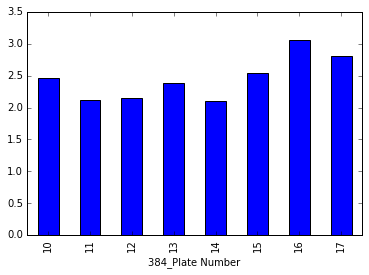

In [268]:
group384.Magnitude.mean().plot("bar")

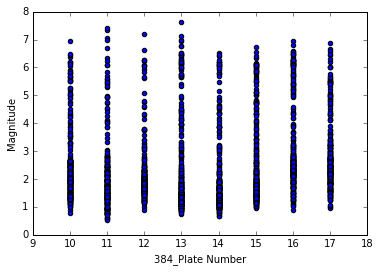

In [267]:
combined.plot(x='384_Plate Number',y='Magnitude', kind = "scatter")

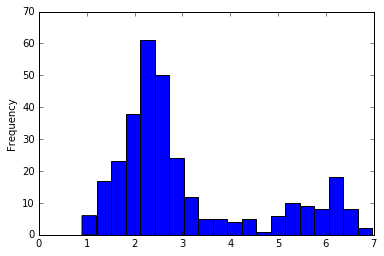

In [272]:
group384.get_group(16)['Magnitude'].plot.hist(bins = 20)

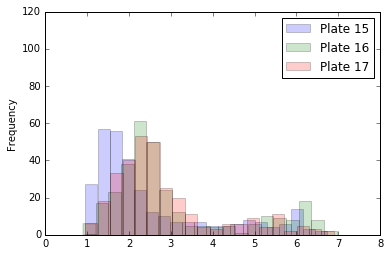

In [317]:
for plate in [15,16,17]:
    group = group384.get_group(plate)
    group.Magnitude.plot.hist(bins = 20, label = 'Plate ' + str(plate), alpha = 0.2)
    plt.axis([0,8,0,120])
    plt.legend(loc = 'upper right')

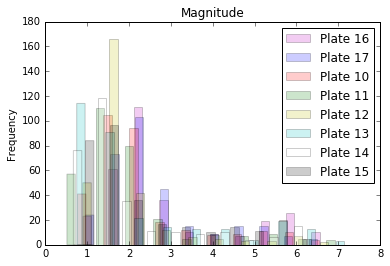

In [307]:
#Example 
fig,ax = plt.subplots(1,1)
colours = ['m','b','r','g','y','c','w','k']
for plate, colour in zip(group384.groups, colours):
    group = group384.get_group(plate)
    group.Magnitude.plot.hist(bins = 10,label='Plate '+ str(plate),alpha=0.2, width = 0.2, color = colour)
ax.set_title('Magnitude')
plt.legend(loc='upper right')